Import all libraries needed

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
rd=pd.read_csv("amazon_prime_titles.csv")
rd.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


In [3]:
print(rd.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Understanding the data

In [4]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


Handling missing / null values

In [5]:
rd["director"].isnull().sum()
rd['director'].fillna("Unknown",inplace=True)
rd['director'].tail(10)

9658                                Unknown
9659                             Gil Junger
9660    John-Paul Davidson, Stephen Warbeck
9661                                Unknown
9662                             Emily Skye
9663                        Joseph H. Lewis
9664                                Unknown
9665                           Steve Barker
9666                                Unknown
9667                          Daniel Barber
Name: director, dtype: object

In [6]:
rd["cast"].fillna("Unknown",inplace=True)
rd["cast"].head(10)

0       Brendan Gleeson, Taylor Kitsch, Gordon Pinsent
1     Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar
2    Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...
3    Interviews with: Pink, Adele, Beyoncé, Britney...
4    Harry Dean Stanton, Kieran O'Brien, George Cos...
5    Gregory Chisholm, Juliet Stevenson, Brian Hens...
6    Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...
7    Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...
8    Michael Paré, Leanne Khol Young, Patrick J. Ma...
9      Kirstie Alley, Sam Waterston, Stockard Channing
Name: cast, dtype: object

In [7]:
rd["country"].fillna("Unknown",inplace=True)
rd["country"]

0               Canada
1                India
2        United States
3        United States
4       United Kingdom
             ...      
9663           Unknown
9664           Unknown
9665           Unknown
9666           Unknown
9667           Unknown
Name: country, Length: 9668, dtype: object

Removing column with huge amount of null values

In [8]:
rd["date_added"]=pd.to_datetime(rd["date_added"])
print(rd["date_added"].isnull().sum())
rd.drop(columns=["date_added"], inplace=True)

9513


In [9]:
rd["rating"].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [10]:
rd["rating"].fillna("UNRATED",inplace=True)
rd["rating"]

0       UNRATED
1           13+
2       UNRATED
3       UNRATED
4       UNRATED
         ...   
9663         7+
9664        13+
9665          R
9666      TV-MA
9667          R
Name: rating, Length: 9668, dtype: object

Converting duration into minutes

In [11]:
rd["duration"]=rd["duration"].str.replace(r'(\d+)\s*Season[s]?',lambda x: str(int(x.group(1))*360)+' min',regex=True)
rd["duration"]

0        113 min
1        110 min
2         74 min
3         69 min
4         45 min
          ...   
9663      60 min
9664    1440 min
9665      90 min
9666     360 min
9667     103 min
Name: duration, Length: 9668, dtype: object

In [12]:
print(rd["type"].value_counts())
rd["type"].value_counts(normalize=True)*100

type
Movie      7814
TV Show    1854
Name: count, dtype: int64


type
Movie      80.823335
TV Show    19.176665
Name: proportion, dtype: float64

In [13]:
rd["release_year"].value_counts().sort_index()

release_year
1920       3
1922       2
1923       1
1924       1
1925       8
        ... 
2017     562
2018     623
2019     929
2020     962
2021    1442
Name: count, Length: 100, dtype: int64

In [14]:
rd["rating"].value_counts().head(10)

rating
13+        2117
16+        1547
ALL        1268
18+        1243
R          1010
PG-13       393
7+          385
UNRATED     370
PG          253
NR          223
Name: count, dtype: int64

Splitting data with multivalues

In [15]:
rd["country"].str.split(", ").explode().value_counts().head(10)

country
Unknown           8996
United States      334
India              246
United Kingdom      67
Canada              35
France              20
Germany             17
Italy               14
Spain               11
Japan                6
Name: count, dtype: int64

In [16]:
rd["cast"].str.split(", ").explode().value_counts().head(10)

cast
Unknown               1233
Maggie Binkley          56
1                       35
Gene Autry              32
Nassar                  30
Champion                29
Anne-Marie Newland      25
Prakash Raj             24
John Wayne              23
Roy Rogers              23
Name: count, dtype: int64

In [17]:
rd["listed_in"].str.split(", ").explode().value_counts().head(10)

listed_in
Drama               3687
Comedy              2099
Action              1657
Suspense            1501
Kids                1085
Documentary          993
Special Interest     980
Horror               875
Romance              674
Animation            547
Name: count, dtype: int64

In [18]:
rd["country"].groupby(rd["type"]).value_counts()

type     country                              
Movie    Unknown                                  7245
         India                                     213
         United States                             194
         United Kingdom                             24
         Canada                                     16
                                                  ... 
TV Show  Czech Republic, Germany                     1
         France                                      1
         New Zealand                                 1
         United Kingdom, Canada, United States       1
         United States, United Kingdom, Canada       1
Name: count, Length: 97, dtype: int64

In [19]:
rd["listed_in"].str.split(", ").explode().groupby(rd["type"]).value_counts()

type     listed_in                
Movie    Drama                        3206
         Comedy                       1821
         Action                       1502
         Suspense                     1381
         Horror                        845
                                      ... 
TV Show  Western                        10
         Faith and Spirituality          9
         Military and War                8
         Music Videos and Concerts       6
         Arthouse                        1
Name: count, Length: 61, dtype: int64

DATA VISUALIZATION

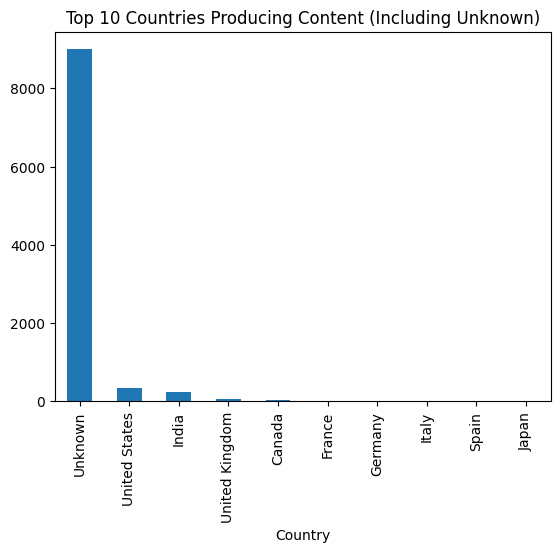

In [20]:
rd["country"].str.split(", ").explode().value_counts().head(10)\
.plot(kind="bar",title="Top 10 Countries Producing Content (Including Unknown)")
plt.xlabel("Country")
plt.show()

Analysis after 'EXCLUDING' unknown values

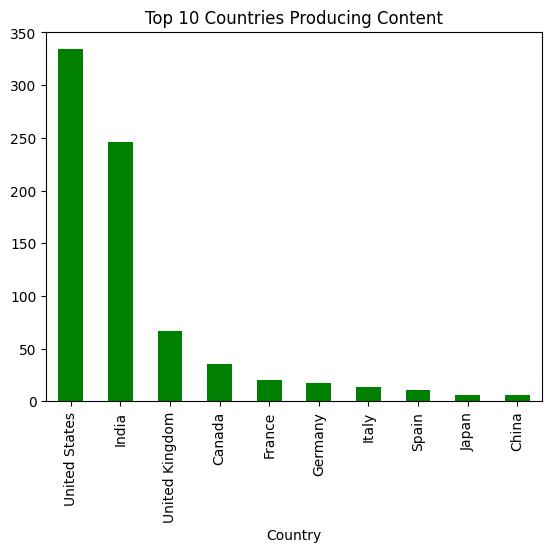

In [21]:
rd[rd['country'] != 'Unknown']['country'].str.split(", ").explode().value_counts().head(10)\
    .plot(kind="bar",title="Top 10 Countries Producing Content",color="green")
plt.xlabel("Country")
plt.show()

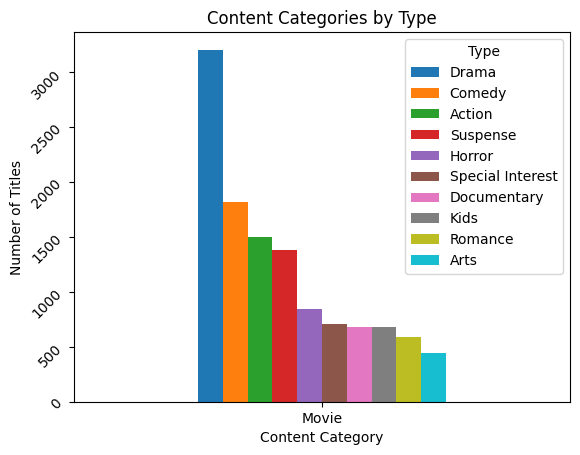

In [22]:
rd["listed_in"].str.split(', ').explode().groupby(rd["type"]).value_counts().head(10).unstack()\
    .plot(kind="bar",title="Content Categories by Type")\
    .set_xlabel("Content Category")\

plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.xticks(rotation=360)
plt.yticks(rotation=45)
plt.show()

Pie chart showing distribution of Movie over TV shows

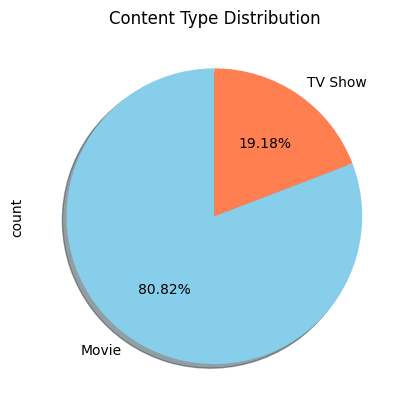

In [23]:
rd['type'].value_counts().plot(kind='pie', title="Content Type Distribution",
autopct='%1.2f%%',shadow=True,startangle=90,colors=['skyblue','coral'])
plt.show()

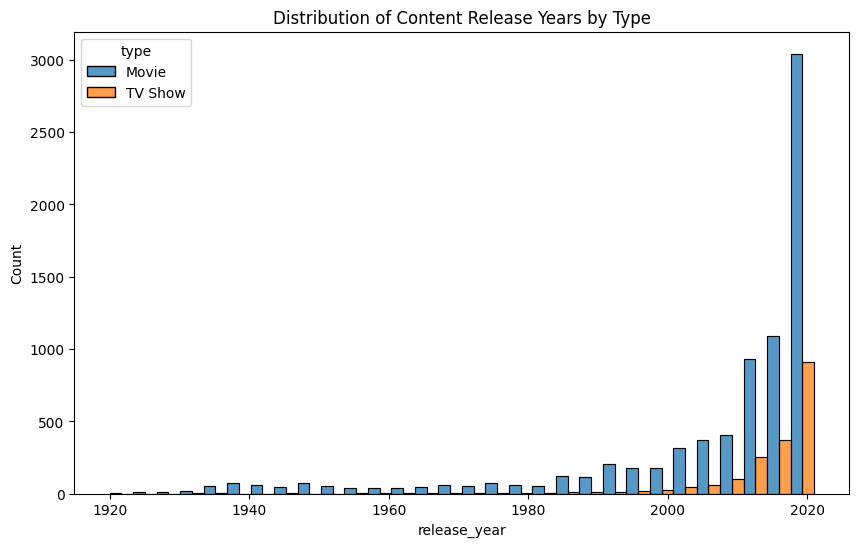

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(data=rd,x="release_year",hue="type",multiple="dodge",bins=30)
plt.title("Distribution of Content Release Years by Type")
plt.show()

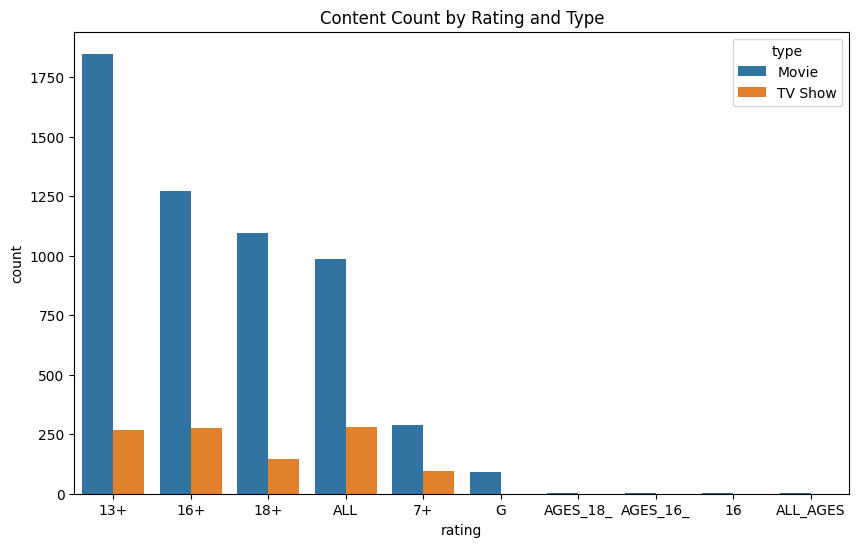

In [37]:
plt.figure(figsize=(10,6))
grouped_data=rd.groupby(["rating", "type"]).size().head(15)\
.reset_index(name="count").sort_values(by="count", ascending=False)
sns.barplot(data=grouped_data, x="rating", y="count", hue="type")
plt.title("Content Count by Rating and Type")
plt.show()

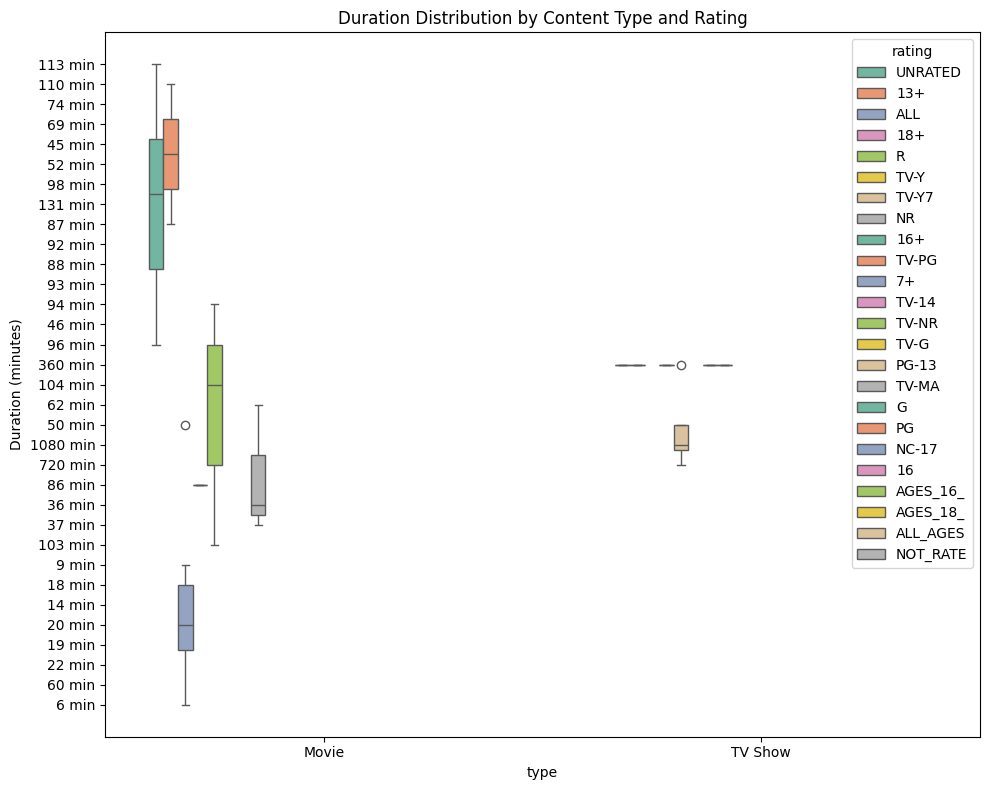

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(data=rd, x="type", y=rd["duration"].head(50), hue=rd["rating"], palette="Set2")
title="Duration Distribution by Content Type and Rating"
plt.title(title)
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.show()

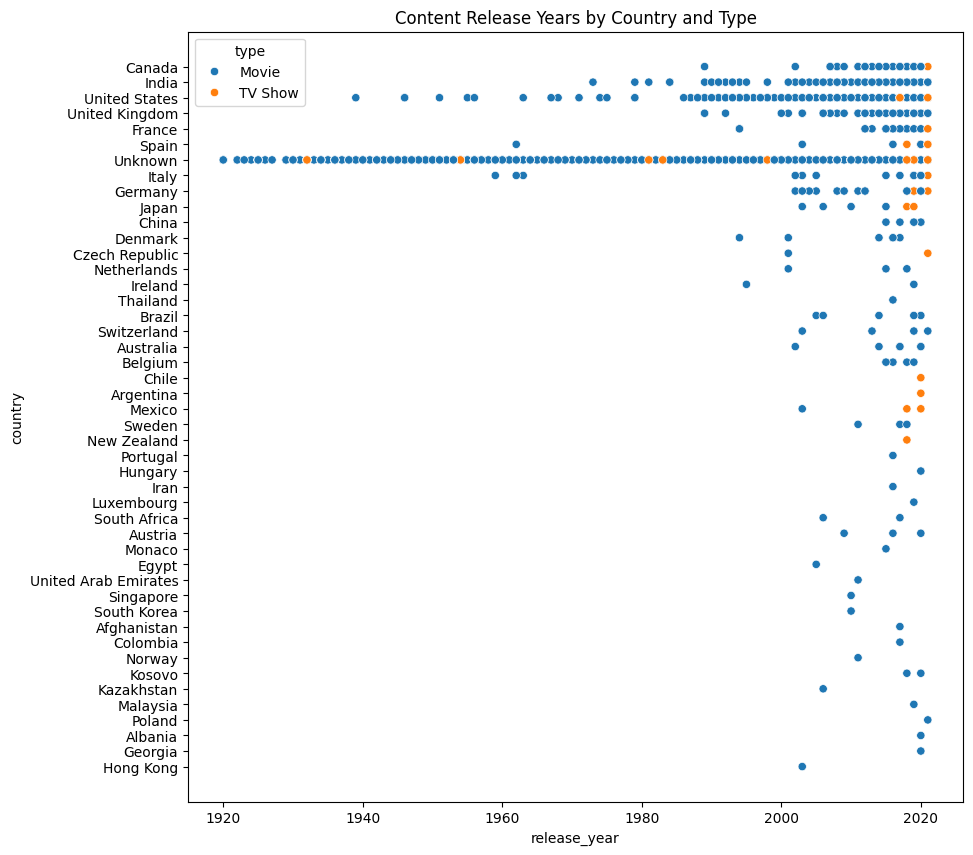

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=rd,x="release_year",y=rd["country"].str.split(", ").explode(),hue="type")
title="Content Release Years by Country and Type"
plt.title(title)
plt.show()

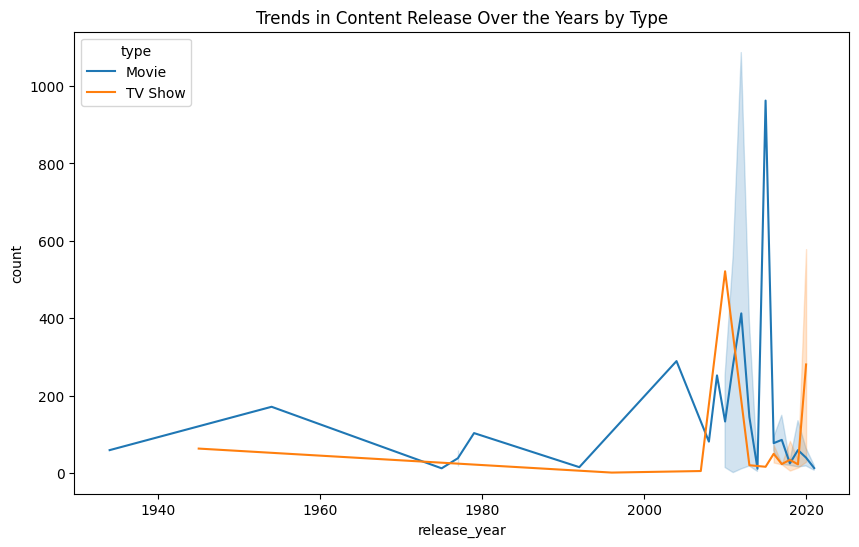

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(data=rd, x=rd["release_year"], y=rd["release_year"].value_counts(),hue="type")
plt.title("Trends in Content Release Over the Years by Type")
plt.show()

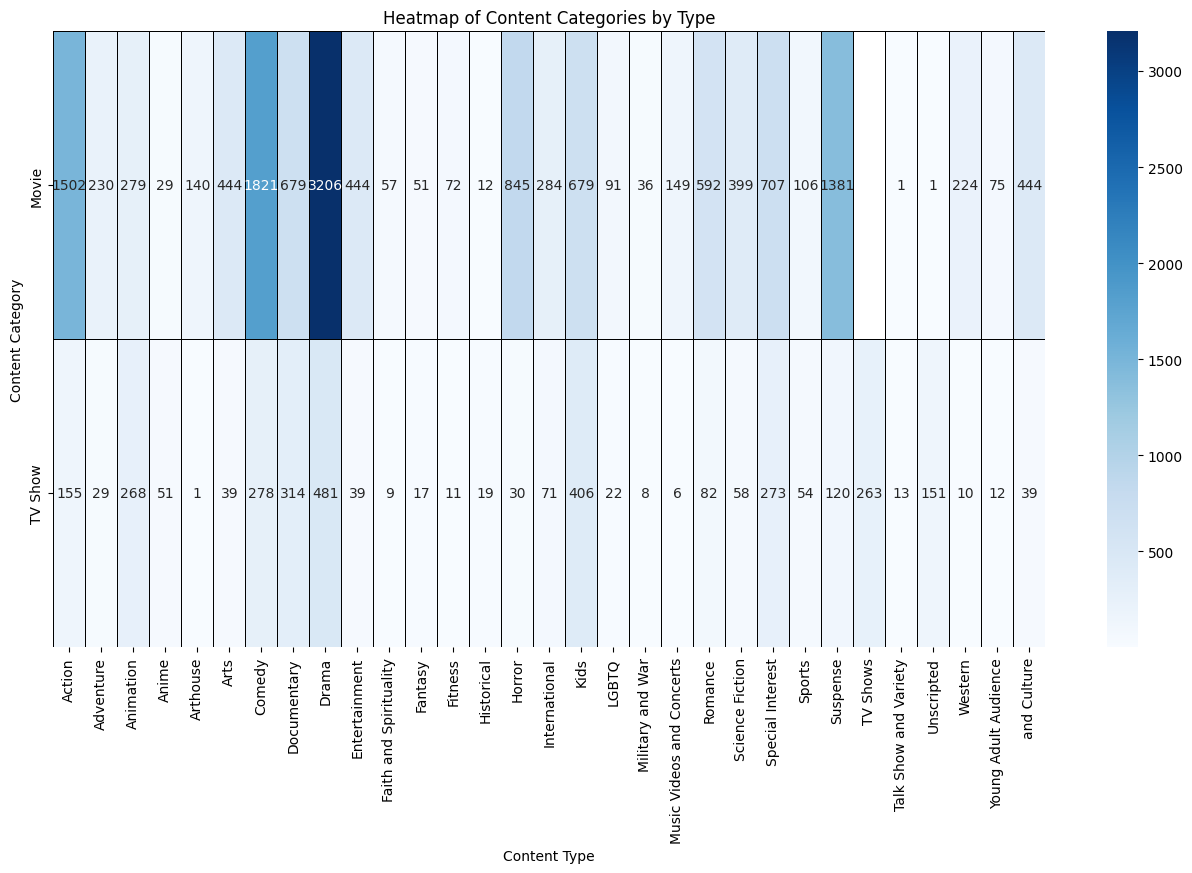

In [46]:
plt.figure(figsize=(16,8))
genre_type=rd["listed_in"].str.split(', ').explode().groupby(rd["type"]).value_counts().unstack()
sns.heatmap(genre_type,annot=True, fmt=".0f",cmap='Blues',linewidths=0.5, linecolor='black')
title="Heatmap of Content Categories by Type"
plt.title(title)
plt.xlabel("Content Type")
plt.ylabel("Content Category")
plt.show()